In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
y_train_names = pd.Series(y_train.flatten()).apply(lambda x: class_names[x])
y_train_names

0               cattle
1             dinosaur
2                apple
3                  boy
4        aquarium_fish
             ...      
49995         squirrel
49996           beetle
49997             bear
49998           beetle
49999            shark
Length: 50000, dtype: object

## Visualizing Sample Images from CIFAR-100

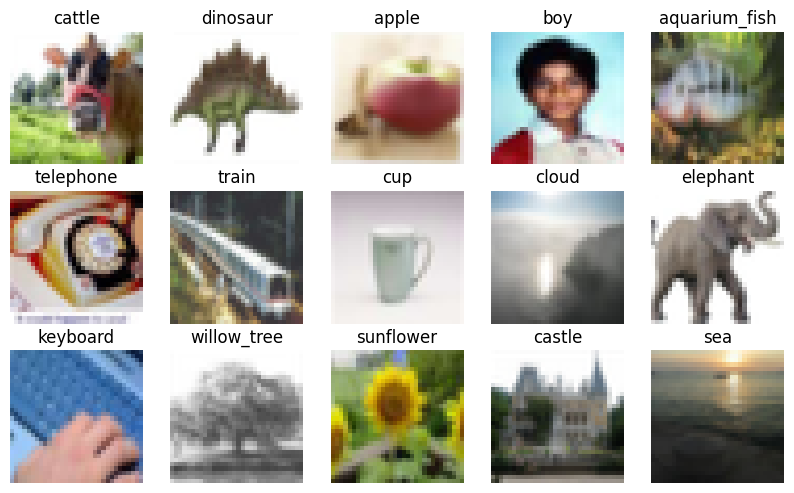

In [39]:
plt.figure(figsize = (10,10))
for i in range (15):
  grid = plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(y_train_names[i])
  plt.axis('off')

plt.show()

## Data Preprocessing

In [40]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

## CNN Architecture

In [41]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='elu', input_shape=x_train.shape[1:]))

model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='elu'))

model.add(Conv2D(256, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='elu'))

model.add(Conv2D(512, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_69 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 15, 15, 256)       295168    
                                                                 
 conv2d_71 (Conv2D)          (None, 13, 13, 256)       590080    
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                               

In [42]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001, weight_decay=1e-6), metrics=['accuracy'])

## Data Augmentation Using ImageDataGenerator and Model Training with Early Stopping

In [9]:
datagen = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True)
datagen.fit(x_train)

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

history = model.fit(datagen.flow(x_train, y_train, batch_size=50), 
                   steps_per_epoch=x_train.shape[0] // 50,
                   epochs=600,
                   validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stop])

## Plotting Validation Loss and Accuracy History

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## Model evaluation

In [ ]:
from tensorflow.keras.models import load_model
model.save('model.keras')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [43]:
from tensorflow.keras.models import load_model

model =load_model('model.keras')

In [119]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Class Probability Distribution and Top 5 Predictions Visualization

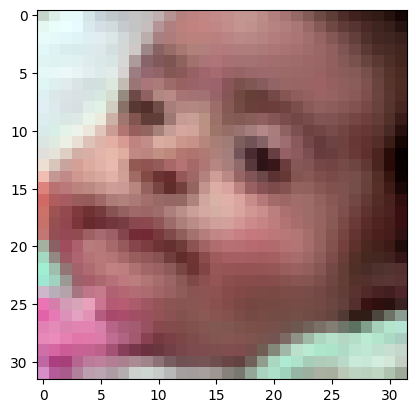

In [197]:
plt.imshow(x_test[54])

In [205]:
image = x_test[54].reshape(1, 32, 32, 3)

In [206]:
class_names[model.predict(image).argmax(axis = 1)[0]]

1/1 [==============================] - 0s 68ms/step


'boy'

1/1 [==============================] - 0s 100ms/step


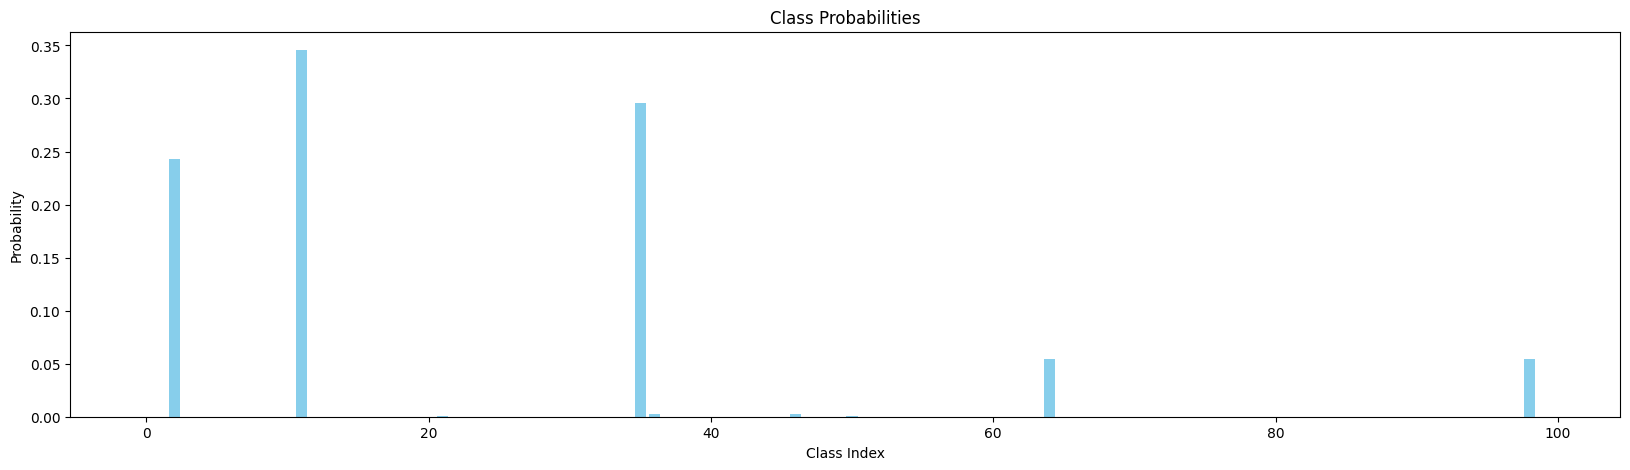

1/1 [==============================] - 0s 116ms/step
Top 5 predicted classes with probabilities:
1. Class 11 (Name: boy): 0.3456
2. Class 35 (Name: girl): 0.2959
3. Class 2 (Name: baby): 0.2426
4. Class 98 (Name: woman): 0.0543
5. Class 64 (Name: possum): 0.0542


In [210]:
predictions = model.predict(image)
probabilities = predictions[0] 
plt.figure(figsize=(20, 5))
plt.bar(range(100), probabilities, color='skyblue')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(0, 100, 5), rotation=90) 
plt.title('Class Probabilities')
plt.show()
predictions = model.predict(image)

probabilities = predictions[0] 
top_classes = np.argsort(probabilities)[-5:][::-1]
top_probabilities = probabilities[top_classes]

print("Top 5 predicted classes with probabilities:")
for i, (cls, prob) in enumerate(zip(top_classes, top_probabilities)):
    print(f"{i+1}. Class {cls} (Name: {class_names[cls]}): {prob:.4f}")